# Can Preventive Care Lower Healthfirst Hospital Claim Costs?

In my personal experience and observation, Healthfirst invests a lot of resources into covering and promoting preventive care services such as annual physical exams, preventitive testing, gym memberships, etc. It bears the question: what can a health insurance gain from investing resources into preventive care services? With assumption that hospital claims make up a major part of Healthfirst's costs, I decided to research if investing into preventive care can lower the costs associated with hospital claims.

For this analysis, I used 3 dataset NYS Department of Health. They can be found at below links:


Hospital Inpatient Prevention Quality Indicators (PQI) for Adult Discharges by Zip Code (SPARCS): Beginning 2009. https://health.data.ny.gov/Health/Hospital-Inpatient-Prevention-Quality-Indicators-P/5q8c-d6xq/about_data

Quality Assurance Reporting Requirements: Beginning 2008.
https://health.data.ny.gov/Health/Quality-Assurance-Reporting-Requirements-Beginning/vbkk-tipq/data

Hospital Inpatient Cost Transparency: Beginning 2009.https://health.data.ny.gov/Health/Hospital-Inpatient-Cost-Transparency-Beginning-200/7dtz-qxmr/data

Below are the data transformation and analysis that I have completed for this project:


In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset 1: Hospital Inpatient Prevention Quality Indicator for Adult Discharges by Zip Code

This dataset shows hospital discharges among adults that could have been prevented with proper preventive care.The Data covers various NYS hospitals for years 2015 through 2020. 

In [2]:
# Importing the dataset

df = pd.read_csv (r"C:\Users\irubinstein\OneDrive - Healthfirst\Desktop\Data Analytics\Capstone Project\Hospital_Inpatient_Prevention_Quality_Indicators__PQI__for_Adult_Discharges_by_Zip_Code__SPARCS___Beginning_2009_20240528.csv")

In [3]:
# reviewing the dataset output

df.head ()

,Year,Software Version,Patient Zipcode,PQI Number,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People"
0,2015,5.0,STATEWIDE,PQI_01,Diabetes Short-Term Complications,64.12,64.12
1,2015,5.0,STATEWIDE,PQI_03,Diabetes Long-Term Complications,122.57,122.57
2,2015,5.0,STATEWIDE,PQI_05,Chronic Obstructive Pulmonary Disease (COPD) o...,491.16,491.16
3,2015,5.0,STATEWIDE,PQI_07,Hypertension,55.32,55.32
4,2015,5.0,STATEWIDE,PQI_08,Heart Failure,323.49,323.49


In [4]:
# dropping columns that are insignificant for analysis

drop_cols=['Software Version', 'PQI Number']
df.drop(drop_cols, inplace=True, axis=1)

In [5]:
# reviewing the dataset output

df.head ()

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People"
0,2015,STATEWIDE,Diabetes Short-Term Complications,64.12,64.12
1,2015,STATEWIDE,Diabetes Long-Term Complications,122.57,122.57
2,2015,STATEWIDE,Chronic Obstructive Pulmonary Disease (COPD) o...,491.16,491.16
3,2015,STATEWIDE,Hypertension,55.32,55.32
4,2015,STATEWIDE,Heart Failure,323.49,323.49


In [6]:
# checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322415 entries, 0 to 322414
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              322415 non-null  int64  
 1   Patient Zipcode                   322415 non-null  object 
 2   PQI Name                          322415 non-null  object 
 3   Observed Rate Per 100,000 People  322252 non-null  float64
 4   Expected Rate Per 100,000 People  322234 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.3+ MB


In [7]:
# converting float64 into numeric format

df1 = df.copy()
df1['Observed Rate Per 100,000 People'] = pd.to_numeric(df['Observed Rate Per 100,000 People'])
df1['Expected Rate Per 100,000 People'] = pd.to_numeric(df['Expected Rate Per 100,000 People'])
df1

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People"
0,2015,STATEWIDE,Diabetes Short-Term Complications,64.12,64.12
1,2015,STATEWIDE,Diabetes Long-Term Complications,122.57,122.57
2,2015,STATEWIDE,Chronic Obstructive Pulmonary Disease (COPD) o...,491.16,491.16
3,2015,STATEWIDE,Hypertension,55.32,55.32
4,2015,STATEWIDE,Heart Failure,323.49,323.49
...,...,...,...,...,...
322410,2020,Statewide,Prevention Quality Acute Composite,200.12,200.12
322411,2020,Statewide,Prevention Quality Chronic Composite,793.77,793.77
322412,2020,Statewide,Prevention Quality All Diabetes Composite,233.66,233.66
322413,2020,Statewide,Prevention Quality All Circulatory Composite,398.75,398.75


In [8]:
# adding a column titled "Preventable Rate Per 100K People". This column is found by "Observed Rate" - "Expected Rate". 
# this column shows the rate of inpatient hospital admissions that could have been prevented with preventive care.

df1.insert(5, "Preventable Rate Per 100K People", df1['Observed Rate Per 100,000 People']-df1['Expected Rate Per 100,000 People'])
df1

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People",Preventable Rate Per 100K People
0,2015,STATEWIDE,Diabetes Short-Term Complications,64.12,64.12,0.0
1,2015,STATEWIDE,Diabetes Long-Term Complications,122.57,122.57,0.0
2,2015,STATEWIDE,Chronic Obstructive Pulmonary Disease (COPD) o...,491.16,491.16,0.0
3,2015,STATEWIDE,Hypertension,55.32,55.32,0.0
4,2015,STATEWIDE,Heart Failure,323.49,323.49,0.0
...,...,...,...,...,...,...
322410,2020,Statewide,Prevention Quality Acute Composite,200.12,200.12,0.0
322411,2020,Statewide,Prevention Quality Chronic Composite,793.77,793.77,0.0
322412,2020,Statewide,Prevention Quality All Diabetes Composite,233.66,233.66,0.0
322413,2020,Statewide,Prevention Quality All Circulatory Composite,398.75,398.75,0.0


In [9]:
# analyzing data

df1.describe()

,Year,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People",Preventable Rate Per 100K People
count,322415.000000,322252.000000,322234.000000,322234.000000
mean,2014.360145,311.769373,292.325753,19.444318
std,3.428333,665.429565,362.413646,558.060754
min,2009.000000,0.000000,0.000000,-6355.030000
25%,2011.000000,11.550000,48.620000,-72.497500
50%,2014.000000,133.985000,163.240000,-16.610000
75%,2017.000000,386.220000,377.540000,49.410000
max,2020.000000,149999.960000,7982.700000,149255.810000


In [10]:
# separating data by years. For the purpose of this analysis, I will only review data for 2018, 2019 and 2020
df2018 = df1.loc[df['Year'] == 2018]
df2018

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People",Preventable Rate Per 100K People
905,2018,10474,Heart Failure,354.16,241.65,112.51
1026,2018,10474,Bacterial Pneumonia,111.01,86.06,24.95
3209,2018,06390,Diabetes Short-Term Complications,0.00,49.91,-49.91
4361,2018,10518,Heart Failure,98.23,292.03,-193.80
4603,2018,10518,Bacterial Pneumonia,0.00,148.92,-148.92
...,...,...,...,...,...,...
272420,2018,Statewide,Prevention Quality Acute Composite,300.94,300.94,0.00
272421,2018,Statewide,Prevention Quality Chronic Composite,1028.04,1028.04,0.00
272422,2018,Statewide,Prevention Quality All Diabetes Composite,257.77,257.77,0.00
272423,2018,Statewide,Prevention Quality All Circulatory Composite,482.51,482.51,0.00


In [11]:
df2019 = df1.loc[df['Year'] == 2019]
df2019

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People",Preventable Rate Per 100K People
232483,2019,10006,Urinary Tract Infection,0.00,33.51,-33.51
232603,2019,10006,Uncontrolled Diabetes,0.00,17.10,-17.10
233994,2019,10006,Asthma in Younger Adults,0.00,23.54,-23.54
234356,2019,10014,Asthma in Younger Adults,0.00,27.32,-27.32
234842,2019,10023,Uncontrolled Diabetes,9.60,43.74,-34.14
...,...,...,...,...,...,...
297414,2019,Statewide,Prevention Quality Acute Composite,276.22,276.22,0.00
297415,2019,Statewide,Prevention Quality Chronic Composite,1030.27,1030.27,0.00
297416,2019,Statewide,Prevention Quality All Diabetes Composite,263.40,263.40,0.00
297417,2019,Statewide,Prevention Quality All Circulatory Composite,493.64,493.64,0.00


In [12]:
df2020 = df1.loc[df['Year'] == 2020]
df2020

,Year,Patient Zipcode,PQI Name,"Observed Rate Per 100,000 People","Expected Rate Per 100,000 People",Preventable Rate Per 100K People
297033,2020,10031,Bacterial Pneumonia,56.41,85.17,-28.76
297317,2020,10016,Uncontrolled Diabetes,36.58,27.76,8.82
297419,2020,06390,Diabetes Short-Term Complications,0.00,51.57,-51.57
297420,2020,06390,Diabetes Long-Term Complications,0.00,105.50,-105.50
297421,2020,06390,Chronic Obstructive Pulmonary Disease (COPD) o...,0.00,211.45,-211.45
...,...,...,...,...,...,...
322410,2020,Statewide,Prevention Quality Acute Composite,200.12,200.12,0.00
322411,2020,Statewide,Prevention Quality Chronic Composite,793.77,793.77,0.00
322412,2020,Statewide,Prevention Quality All Diabetes Composite,233.66,233.66,0.00
322413,2020,Statewide,Prevention Quality All Circulatory Composite,398.75,398.75,0.00


In [13]:
# grouping the data by health condition found in PQI Name column

df2018combined=df2018.groupby(['PQI Name'])['Preventable Rate Per 100K People'].mean().reset_index()

In [14]:
df2019combined=df2019.groupby(['PQI Name'])['Preventable Rate Per 100K People'].mean().reset_index()

In [15]:
df2020combined=df2020.groupby(['PQI Name'])['Preventable Rate Per 100K People'].mean().reset_index()

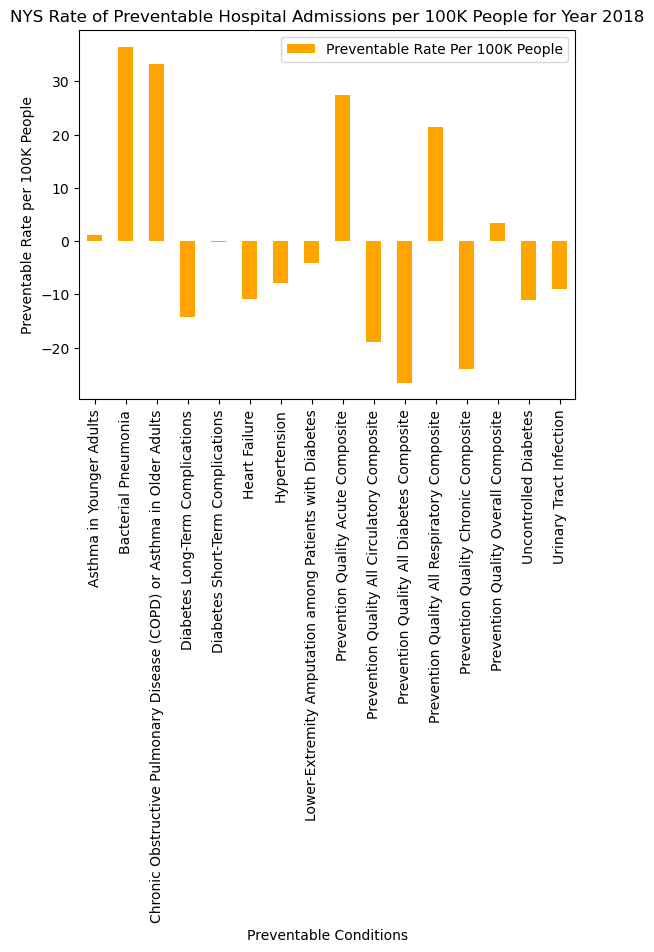

In [16]:
# creating a visualization for each year

df2018combined.plot.bar(x='PQI Name', y='Preventable Rate Per 100K People', color='orange')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Preventable Rate per 100K People')
plt.title ("NYS Rate of Preventable Hospital Admissions per 100K People for Year 2018")
plt.rcParams['figure.figsize'] = (12,5)

# Conclusion: 

For the year 2018, hospitals across NYS have identified bacterial pneumonia and COPD or asthma in older adults as conditions that led the most to patient hospitalizations. These conditions could have been prevented with proper preventive care, therefore reducing hospital admissions and consequently hospital claims.

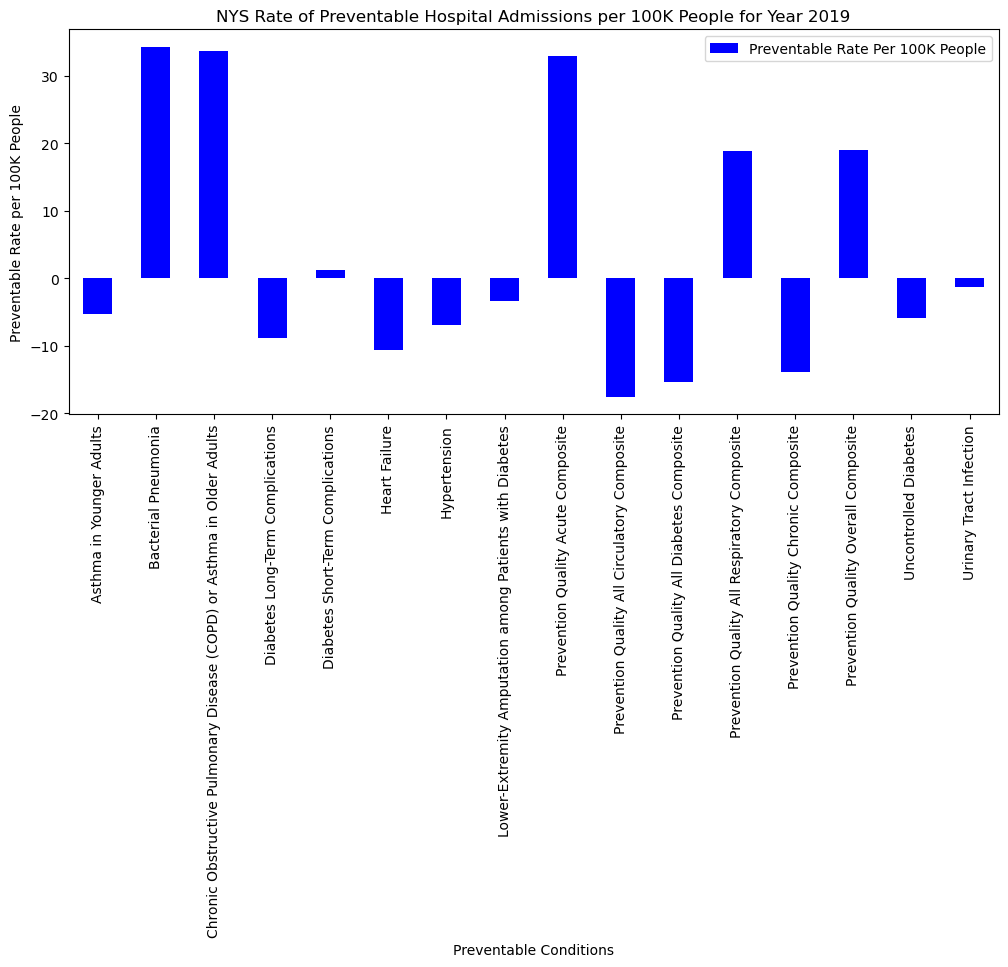

In [17]:
df2019combined.plot.bar(x='PQI Name', y='Preventable Rate Per 100K People', color='blue')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Preventable Rate per 100K People')
plt.title ("NYS Rate of Preventable Hospital Admissions per 100K People for Year 2019")
plt.rcParams['figure.figsize'] = (12,5)

# Conclusion: 

For the year 2019, hospitals across NYS have identified bacterial pneumonia and COPD or asthma in older adults as conditions that led the most to patient hospitalizations. This is similar to year 2018. These conditions could have been prevented with proper preventive care, therefore reducing hospital admissions and consequently hospital claims.

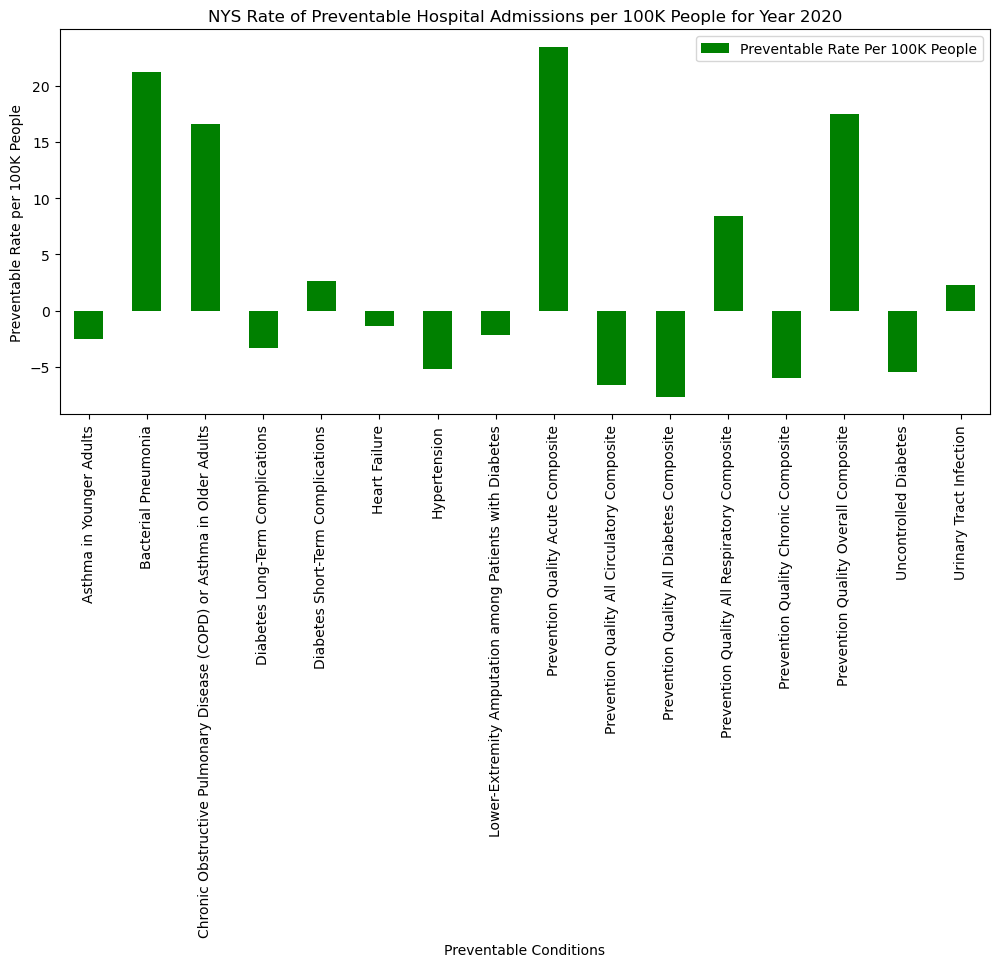

In [18]:
df2020combined.plot.bar(x='PQI Name', y='Preventable Rate Per 100K People', color='green')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Preventable Rate per 100K People')
plt.title ("NYS Rate of Preventable Hospital Admissions per 100K People for Year 2020")
plt.rcParams['figure.figsize'] = (12,5)

# Conclusion

For the year 2020, hospitals across NYS have identified bacterial pneumonia and COPD or asthma in older adults as conditions that led the most to patient hospitalizations. This is similar to year 2018 and 2019. These conditions could have been prevented with proper preventive care, therefore reducing hospital admissions and consequently hospital claims.

# Dataset 2: Quality Assurance Reporting Requirements Beginning 2008

This dataset shows different insurers across NYS and specific preventitive measures that each insurer can improve on.The data covers yeas 2008 through 2022. My goal with this dataset is to narrow down Plan Name to Healthfirst and see what measures Healthfirst can improve in to serve its members better.

In [19]:
# Importing the dataset and reviewing the output

df2 = pd.read_csv (r"C:\Users\irubinstein\OneDrive - Healthfirst\Desktop\Data Analytics\Capstone Project\Quality_Assurance_Reporting_Requirements__Beginning_2008.csv")
df2.head()

,Report Year,Measurement Year,Payer,Plan ID,Plan Name,Domain,Sub Domain,Measure Description,Measure,Method of Data Collection,...,Level of Significance,Percentile 90th,Percentile 75th,Percentile 50th,Percentile 25th,Percentile 10th,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-19yr,Administrative Review,...,NaN,97.0,96.0,95.0,92.0,89.0,NaN,NaN,NaN,NaN
1,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-24m,Administrative Review,...,NaN,100.0,100.0,99.0,97.0,94.0,NaN,NaN,NaN,NaN
2,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 25m-6yr,Administrative Review,...,NaN,98.0,96.0,95.0,94.0,87.0,NaN,NaN,NaN,NaN
3,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 7-11yr,Administrative Review,...,NaN,99.0,98.0,97.0,95.0,93.0,NaN,NaN,NaN,NaN
4,2008,2008,Child Health Plus,NaN,Statewide Average,Adult Health,Managing Preventive Care for Adults,Annual Dental Visit (Ages 19-21),Dental Visits 19-21yr,Administrative Review,...,NaN,57.0,54.0,52.0,41.0,36.0,NaN,NaN,NaN,NaN


In [20]:
# checking if database has any missing values

df2.isnull().sum()

Report Year                       0
Measurement Year                  0
Payer                             0
Plan ID                       13965
Plan Name                         0
Domain                            0
Sub Domain                        0
Measure Description               0
Measure                           0
Method of Data Collection      3081
Eligible Population           36415
Denominator                   15508
Numerator                     16203
Rate                          13439
Level of Significance         76257
Percentile 90th               26456
Percentile 75th               26456
Percentile 50th               26456
Percentile 25th               26456
Percentile 10th               25941
Unnamed: 20                  128301
Unnamed: 21                  128301
Unnamed: 22                  128301
Unnamed: 23                  128301
dtype: int64

In [21]:
# replacing non-standard missing values

missing_values = ['na', 'NA', '--', 'NaN']
df2 = pd.read_csv(r"C:\Users\irubinstein\OneDrive - Healthfirst\Desktop\Data Analytics\Capstone Project\Quality_Assurance_Reporting_Requirements__Beginning_2008.csv", na_values = missing_values)
df2

,Report Year,Measurement Year,Payer,Plan ID,Plan Name,Domain,Sub Domain,Measure Description,Measure,Method of Data Collection,...,Level of Significance,Percentile 90th,Percentile 75th,Percentile 50th,Percentile 25th,Percentile 10th,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-19yr,Administrative Review,...,NaN,97.00,96.00,95.00,92.00,89.00,NaN,NaN,NaN,NaN
1,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-24m,Administrative Review,...,NaN,100.00,100.00,99.00,97.00,94.00,NaN,NaN,NaN,NaN
2,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 25m-6yr,Administrative Review,...,NaN,98.00,96.00,95.00,94.00,87.00,NaN,NaN,NaN,NaN
3,2008,2008,Child Health Plus,NaN,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 7-11yr,Administrative Review,...,NaN,99.00,98.00,97.00,95.00,93.00,NaN,NaN,NaN,NaN
4,2008,2008,Child Health Plus,NaN,Statewide Average,Adult Health,Managing Preventive Care for Adults,Annual Dental Visit (Ages 19-21),Dental Visits 19-21yr,Administrative Review,...,NaN,57.00,54.00,52.00,41.00,36.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128296,2022,2022,Medicaid Managed Care,2180196,Empire BlueCross BlueShield HealthPlus,Women's Health,Preventive Care for Women,Prenatal Depression Screening and Follow-Up Fo...,Prenatal Depression Screen Fw/ up-E,Electronic,...,Sample size too small to report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128297,2022,2022,Medicaid Managed Care,2180196,Empire BlueCross BlueShield HealthPlus,Women's Health,Preventive Care for Women,Prenatal Immunization Status Combination,Prenatal Immu Status Combo-E,Electronic,...,Significantly worse than the statewide average,31.53,29.39,25.11,18.99,17.85,NaN,NaN,NaN,NaN
128298,2022,2022,Medicaid Managed Care,2180196,Empire BlueCross BlueShield HealthPlus,Women's Health,Preventive Care for Women,Prenatal Immunization Status Influenza,Prenatal Immu Status Flu-E,Electronic,...,Significantly worse than the statewide average,36.41,34.16,29.37,23.19,22.64,NaN,NaN,NaN,NaN
128299,2022,2022,Medicaid Managed Care,2180196,Empire BlueCross BlueShield HealthPlus,Women's Health,Preventive Care for Women,Prenatal Immunization Status Tdap,Prenatal Immu Status Tdap-E,Electronic,...,Significantly worse than the statewide average,74.68,70.54,60.27,48.74,42.92,NaN,NaN,NaN,NaN


In [22]:
# replacing missing values with 0

df2['Eligible Population'].fillna(0)
df2['Denominator'].fillna(0)
df2['Numerator'].fillna(0)
df2['Rate'].fillna(0)

0         94.00
1         99.00
2         95.00
3         97.00
4         49.00
          ...  
128296     0.00
128297    20.91
128298    26.68
128299    42.92
128300    86.02
Name: Rate, Length: 128301, dtype: float64

In [23]:
# dropping columns that are insignificant for analysis

drop_cols=['Report Year', 'Payer', 'Plan ID', 'Method of Data Collection', 'Percentile 90th', 'Percentile 75th', 'Percentile 50th', 'Percentile 25th', 'Percentile 10th', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']
df2.drop(drop_cols, inplace=True, axis=1)

In [24]:
df2.head()

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
0,2008,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-19yr,88793.0,88793.0,83904.0,94.0,NaN
1,2008,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 12-24m,3056.0,3056.0,3013.0,99.0,NaN
2,2008,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 25m-6yr,41384.0,41384.0,39387.0,95.0,NaN
3,2008,Statewide Average,Access to primary care,Access to Primary Care,Children and Adolescents' Access to Primary Ca...,Access to Care 7-11yr,55379.0,55379.0,53792.0,97.0,NaN
4,2008,Statewide Average,Adult Health,Managing Preventive Care for Adults,Annual Dental Visit (Ages 19-21),Dental Visits 19-21yr,1239.0,1239.0,612.0,49.0,NaN


In [25]:
# narrowing down data to plan name "Healthfirst New York"

dfHF = df2.loc[df2['Plan Name'] == 'Healthfirst New York']
dfHF

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
69036,2018,Healthfirst New York,Women's Health,Preventive Care for Women,Breast Cancer Screening,Breast Cancer Screen,8043.0,8043.0,6340.0,78.83,Significantly better than the statewide average
69037,2018,Healthfirst New York,Women's Health,Preventive Care for Women,Cervical Cancer Screening,Cervical Cancer Screen,17746.0,270.0,224.0,82.96,NaN
69038,2018,Healthfirst New York,Women's Health,Preventive Care for Women,Chlamydia Screening (Ages 16-20 and Ages 21-24...,Chlamydia Screening(Composite),3446.0,3446.0,2749.0,79.77,NaN
69039,2018,Healthfirst New York,Women's Health,Preventive Care for Women,Chlamydia Screening (Ages 16-20),Chlamydia 16-20yr,307.0,307.0,249.0,81.11,Significantly better than the statewide average
69040,2018,Healthfirst New York,Women's Health,Preventive Care for Women,Chlamydia Screening (Ages 16-24),Chlamydia 16-24yr,3446.0,3446.0,2749.0,79.77,Significantly better than the statewide average
...,...,...,...,...,...,...,...,...,...,...,...
120295,2022,Healthfirst New York,Women's Health,Preventive Care for Women,Prenatal Depression Screening and Follow-Up Fo...,Prenatal Depression Screen Fw/ up-E,NaN,NaN,NaN,NaN,Sample size too small to report
120296,2022,Healthfirst New York,Women's Health,Preventive Care for Women,Prenatal Immunization Status Combination,Prenatal Immu Status Combo-E,NaN,1104.0,305.0,27.63,Significantly better than the statewide average
120297,2022,Healthfirst New York,Women's Health,Preventive Care for Women,Prenatal Immunization Status Influenza,Prenatal Immu Status Flu-E,NaN,1104.0,362.0,32.79,Significantly better than the statewide average
120298,2022,Healthfirst New York,Women's Health,Preventive Care for Women,Prenatal Immunization Status Tdap,Prenatal Immu Status Tdap-E,NaN,1104.0,660.0,59.78,Significantly better than the statewide average


In [26]:
# narrowing down data to show areas needed improvement by selecting "Significantly worse than the statewide average"
# in column "Level of Significance"

dfHFimp = dfHF.loc[dfHF['Level of Significance'] == 'Significantly worse than the statewide average']
dfHFimp

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
69084,2018,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Medication Management for People with Asthma 5...,ASA Med Mgmt 50% 19-50yr,414.0,414.0,252.0,60.87,Significantly worse than the statewide average
69085,2018,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Medication Management for People with Asthma 7...,ASA Med Mgmt 75% 19-50yr,414.0,414.0,138.0,33.33,Significantly worse than the statewide average
69086,2018,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Medication Management for People with Asthma 7...,ASA Med Mgmt 75% 19-64yr,761.0,761.0,301.0,39.55,Significantly worse than the statewide average
69087,2018,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Medication Management for People with Asthma 7...,ASA Med Mgmt 75% 5-64yr,761.0,761.0,301.0,39.55,Significantly worse than the statewide average
69133,2018,Healthfirst New York,Use of Services,Use of Services,Initiation and Engagement of Alcohol and Other...,Engagement of AOD Tx - Alcohol 18+ Years,991.0,991.0,75.0,7.57,Significantly worse than the statewide average
...,...,...,...,...,...,...,...,...,...,...,...
120221,2022,Healthfirst New York,Behavioral Health,Behavioral Health,Risk of Continued Opioid Use Within 31 Days (A...,COU Within 31 Days (Ages 18-64),7143.0,7143.0,25.0,0.35,Significantly worse than the statewide average
120255,2022,Healthfirst New York,Use of Services,Use of Services,Initiation and Engagement of Substance Use Dis...,Engagement of SUD Tx - Opioid 18-64 Years,92.0,92.0,14.0,15.22,Significantly worse than the statewide average
120257,2022,Healthfirst New York,Use of Services,Use of Services,Initiation and Engagement of Substance Use Dis...,Engagement of SUD Tx - Opioid Total,92.0,92.0,14.0,15.22,Significantly worse than the statewide average
120263,2022,Healthfirst New York,Use of Services,Use of Services,Initiation and Engagement of Substance Use Dis...,Engagement of SUD Tx - Total 18-64 Years,1988.0,1988.0,242.0,12.17,Significantly worse than the statewide average


In [27]:
# separating data by years. For the purpose of this analysis, I will only review data for 2020, 2021 and 2022.

dfHF2020imp = dfHFimp.loc[dfHFimp['Measurement Year'] == 2020]
dfHF2020imp

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
93728,2020,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis,Pharyngitis,5547.0,5547.0,1817.0,32.76,Significantly worse than the statewide average
93729,2020,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis (Ages 18-64),Pharyngitis (18-64yr),5547.0,5547.0,1817.0,32.76,Significantly worse than the statewide average
93741,2020,Healthfirst New York,Adult Health,Managing Medications for Adults,Statin Therapy for Patients with Cardiovascula...,Statin for CVD-Adh. F 40-75yr,264.0,264.0,166.0,62.88,Significantly worse than the statewide average
93751,2020,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Asthma Medication Ratio (Ages 19-50),ASA Med Ratio 19-50yr,694.0,694.0,398.0,57.35,Significantly worse than the statewide average
93752,2020,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Asthma Medication Ratio (Ages 19-64),ASA Med Ratio 19-64yr,1183.0,1183.0,678.0,57.31,Significantly worse than the statewide average
93753,2020,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Asthma Medication Ratio (Ages 5-64),ASA Med Ratio 5-64yr,1183.0,1183.0,678.0,57.31,Significantly worse than the statewide average
93754,2020,Healthfirst New York,Adult Health,Managing Respiratory Conditions for Adults,Asthma Medication Ratio (Ages 51-64),ASA Med Ratio 51-64yr,489.0,489.0,280.0,57.26,Significantly worse than the statewide average
93763,2020,Healthfirst New York,Behavioral Health,Behavioral Health,Antidepressant Medication Management-Effective...,AMM - Acute Phase,1132.0,1132.0,621.0,54.86,Significantly worse than the statewide average
93764,2020,Healthfirst New York,Behavioral Health,Behavioral Health,Antidepressant Medication Management-Effective...,AMM - Cont Phase,1132.0,1132.0,415.0,36.66,Significantly worse than the statewide average
93771,2020,Healthfirst New York,Behavioral Health,Behavioral Health,Follow-Up After High-Intensity Care for Substa...,FUI Within 30 Days,184.0,184.0,87.0,47.28,Significantly worse than the statewide average


In [28]:
dfHF2021imp = dfHFimp.loc[dfHFimp['Measurement Year'] == 2021]
dfHF2021imp

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
105587,2021,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis,Pharyngitis,2916.0,2916.0,928.0,31.82,Significantly worse than the statewide average
105588,2021,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis (Ages 18-64),Pharyngitis (18-64yr),2914.0,2914.0,927.0,31.81,Significantly worse than the statewide average
105591,2021,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Treatment for Upper Respiratory In...,URI Tx-18-64 yr,7215.0,7215.0,1642.0,77.24,Significantly worse than the statewide average
105627,2021,Healthfirst New York,Adult Health,Managing Preventive Care for Adults,Adult Immunization Status Td/Tdap,Adult Immu Status Td/Tdap-E,NaN,157855.0,24340.0,15.42,Significantly worse than the statewide average
105647,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Antidepressant Medication Management-Effective...,AMM - Acute Phase,1506.0,1506.0,861.0,57.17,Significantly worse than the statewide average
105648,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Antidepressant Medication Management-Effective...,AMM - Cont Phase,1506.0,1506.0,634.0,42.10,Significantly worse than the statewide average
105652,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Follow-Up After Emergency Department Visit for...,FUED for Mental illness within 7 days,296.0,296.0,116.0,39.19,Significantly worse than the statewide average
105654,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Follow-Up After Emergency Department Visit for...,FUED for Mental illness within 7 days (Ages 18...,296.0,296.0,116.0,39.19,Significantly worse than the statewide average
105661,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Risk of Continued Opioid Use Within 15 Days,COU Within 15 Days,6642.0,6642.0,138.0,2.08,Significantly worse than the statewide average
105663,2021,Healthfirst New York,Behavioral Health,Behavioral Health,Risk of Continued Opioid Use Within 15 Days (A...,COU Within 15 Days (Ages 18-64),6642.0,6642.0,138.0,2.08,Significantly worse than the statewide average


In [29]:
dfHF2022imp = dfHFimp.loc[dfHFimp['Measurement Year'] == 2022]
dfHF2022imp

,Measurement Year,Plan Name,Domain,Sub Domain,Measure Description,Measure,Eligible Population,Denominator,Numerator,Rate,Level of Significance
120119,2022,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis,Pharyngitis,4715.0,4715.0,1479.0,31.37,Significantly worse than the statewide average
120120,2022,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Testing for Pharyngitis (Ages 18-64),Pharyngitis (18-64yr),4715.0,4715.0,1479.0,31.37,Significantly worse than the statewide average
120122,2022,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Treatment for Upper Respiratory In...,URI Tx-Total,12756.0,12756.0,3252.0,74.51,Significantly worse than the statewide average
120123,2022,Healthfirst New York,Access to primary care,Managing Acute Illness for Adults,Appropriate Treatment for Upper Respiratory In...,URI Tx-18-64 yr,12748.0,12748.0,3249.0,74.51,Significantly worse than the statewide average
120161,2022,Healthfirst New York,Adult Health,Managing Preventive Care for Adults,COVID-19 Immunization Status: Booster,Covid Immu Status Booster Total,117102.0,117102.0,54577.0,46.61,Significantly worse than the statewide average
120162,2022,Healthfirst New York,Adult Health,Managing Preventive Care for Adults,COVID-19 Immunization Status: Booster (Ages 18...,Covid Immu Status Booster 18-64yr,117102.0,117102.0,54577.0,46.61,Significantly worse than the statewide average
120189,2022,Healthfirst New York,Behavioral Health,Behavioral Health,Antidepressant Medication Management-Effective...,AMM - Cont Phase,1612.0,1612.0,687.0,42.62,Significantly worse than the statewide average
120198,2022,Healthfirst New York,Behavioral Health,Behavioral Health,Diagnosed Mental Health Disorders (18-64),Diagnosed MH Disorder 18-64yr,199085.0,199085.0,20841.0,10.47,Significantly worse than the statewide average
120199,2022,Healthfirst New York,Behavioral Health,Behavioral Health,Diagnosed Mental Health Disorders (65+),Diagnosed MH Disorder 65+yr,1277.0,1277.0,126.0,9.87,Significantly worse than the statewide average
120200,2022,Healthfirst New York,Behavioral Health,Behavioral Health,Diagnosed Mental Health Disorders (Total),Diagnosed MH Disorder Total,200362.0,200362.0,20967.0,10.46,Significantly worse than the statewide average


In [30]:
# grouping data by health condition that Healthfirst could improve in

dfHF2020impcombined=dfHF2020imp.groupby(['Measure'])['Rate'].mean().reset_index()
dfHF2020impcombined

,Measure,Rate
0,AMM - Acute Phase,54.86
1,AMM - Cont Phase,36.66
2,ASA Med Ratio 19-50yr,57.35
3,ASA Med Ratio 19-64yr,57.31
4,ASA Med Ratio 5-64yr,57.31
5,ASA Med Ratio 51-64yr,57.26
6,COU Within 15 Days,2.21
7,COU Within 15 Days (Ages 18-64),2.21
8,COU Within 31 Days,1.28
9,COU Within 31 Days (Ages 18-64),1.28


In [31]:
dfHF2021impcombined=dfHF2021imp.groupby(['Measure'])['Rate'].mean().reset_index()
dfHF2021impcombined

,Measure,Rate
0,AMM - Acute Phase,57.17
1,AMM - Cont Phase,42.10
2,Adult Immu Status Td/Tdap-E,15.42
3,COU Within 15 Days,2.08
4,COU Within 15 Days (Ages 18-64),2.08
5,COU Within 31 Days,1.11
6,COU Within 31 Days (Ages 18-64),1.11
7,Engagement of SUD Tx - Total 18+ Years,12.21
8,Engagement of SUD Tx - Total,12.21
9,FUED for Mental illness within 7 days,39.19


In [32]:
dfHF2022impcombined=dfHF2022imp.groupby(['Measure'])['Rate'].mean().reset_index()
dfHF2022impcombined

,Measure,Rate
0,AMM - Cont Phase,42.62
1,COU Within 15 Days,0.97
2,COU Within 15 Days (Ages 18-64),0.97
3,COU Within 31 Days,0.35
4,COU Within 31 Days (Ages 18-64),0.35
5,Covid Immu Status Booster 18-64yr,46.61
6,Covid Immu Status Booster Total,46.61
7,Diagnosed MH Disorder 18-64yr,10.47
8,Diagnosed MH Disorder 65+yr,9.87
9,Diagnosed MH Disorder Total,10.46


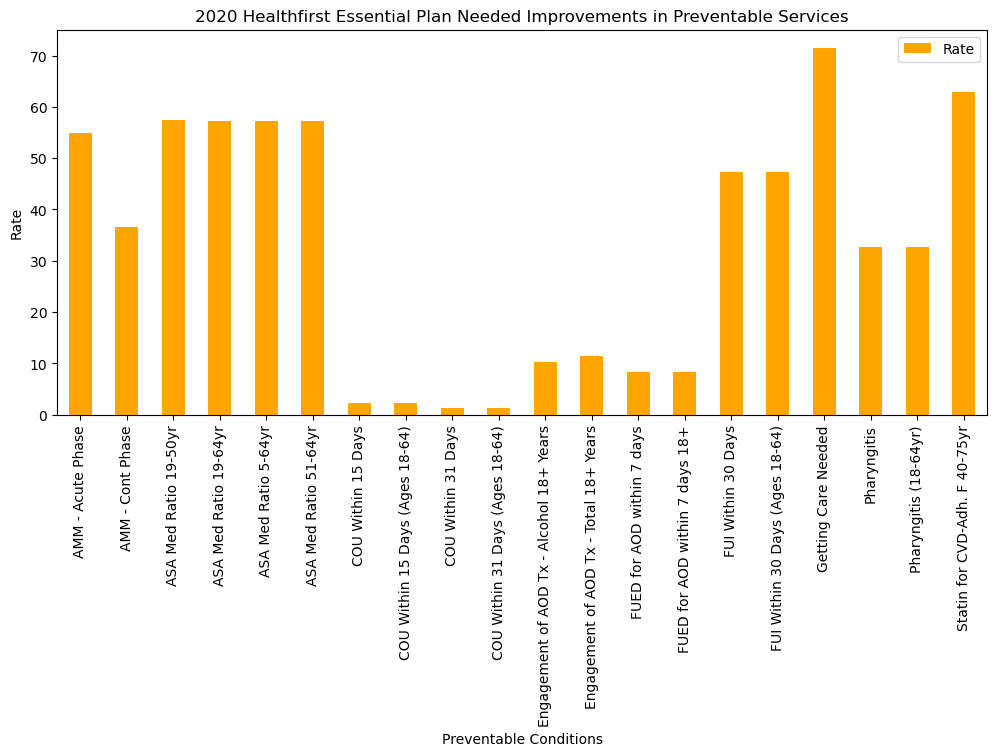

In [33]:
# chart the graph for each year

dfHF2020impcombined.plot.bar(x='Measure', y='Rate', color='orange')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Rate')
plt.title ("2020 Healthfirst Essential Plan Needed Improvements in Preventable Services")
plt.rcParams['figure.figsize'] = (10,10)

# Conclusion

The above report has identified that in 2020 Healthfirst's Essential Plans needed improvement in coverage for the following conditions: AMM and ASA (mental health and behavior), FUI (follow up care) and getting needed care, pharyngitis and statin (medications). Healthfirst could use this report to improve conditions and treatments that it covers.

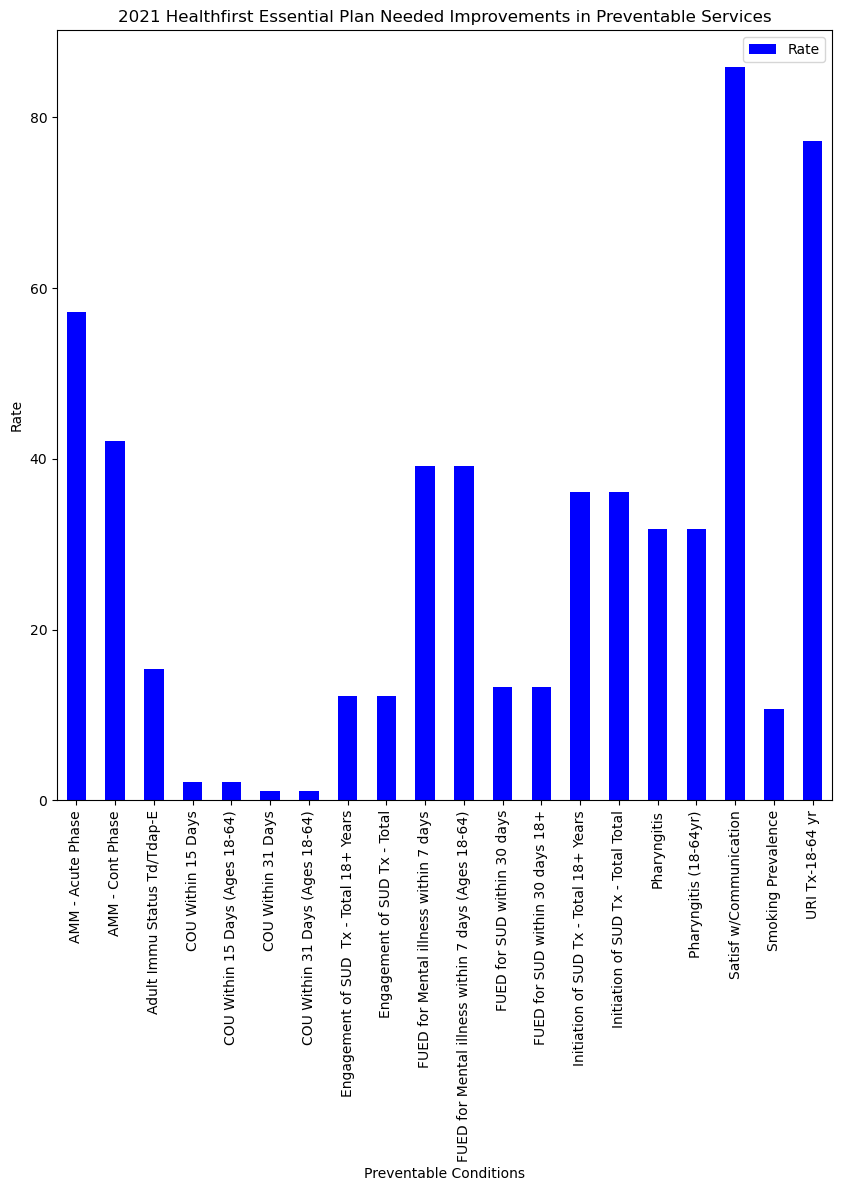

In [34]:
dfHF2021impcombined.plot.bar(x='Measure', y='Rate', color='blue')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Rate')
plt.title ("2021 Healthfirst Essential Plan Needed Improvements in Preventable Services")
plt.rcParams['figure.figsize'] = (10,10)

# Conclusion

The above report has identified that in 2021 Healthfirst's Essential Plans needed improvement in coverage for the following conditions: AMM and ASA and FUED (mental health and behavior), SUD (substance abuse disorders), immunizations, smoking prevalence and upper respitory inections. Healthfirst could use this report to improve conditions and treatments that it covers.

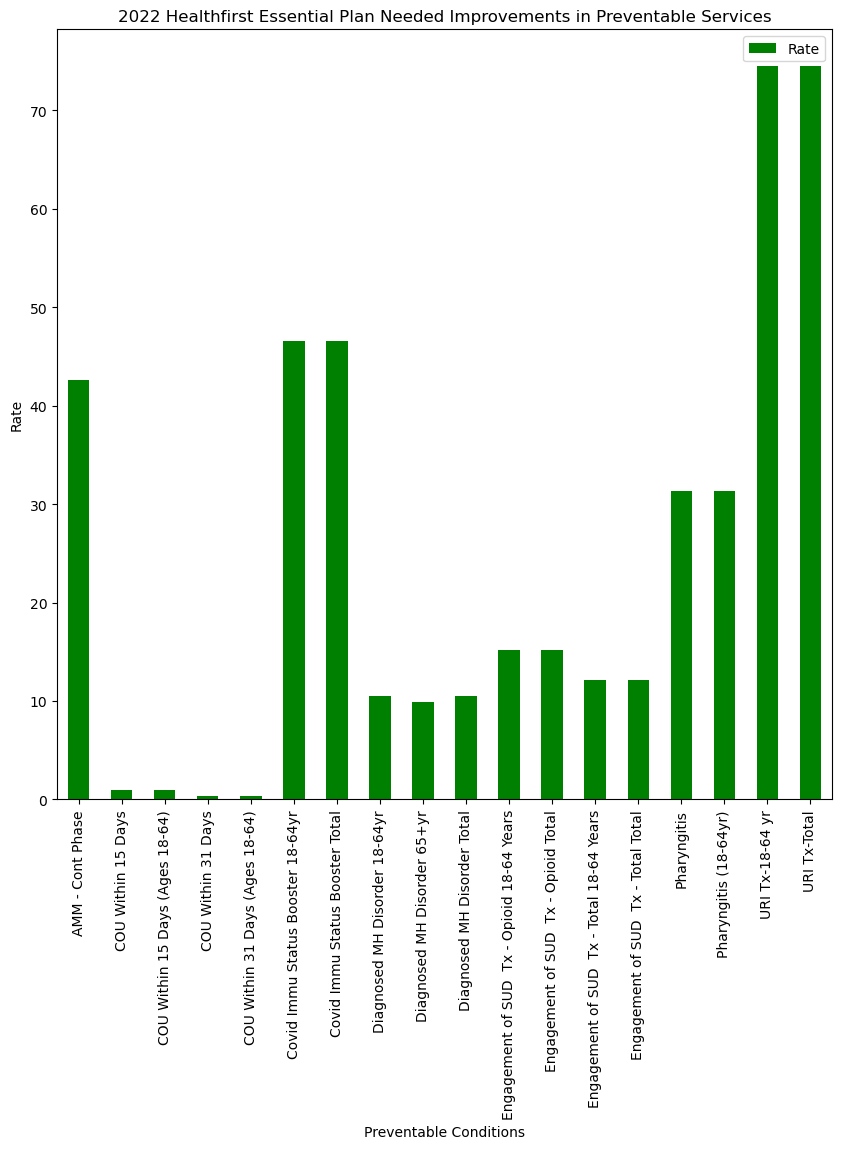

In [35]:
dfHF2022impcombined.plot.bar(x='Measure', y='Rate', color='green')
plt.xlabel ('Preventable Conditions')
plt.ylabel ('Rate')
plt.title ("2022 Healthfirst Essential Plan Needed Improvements in Preventable Services")
plt.rcParams['figure.figsize'] = (10,10)

# Conclusion


The above report has identified that in 2022 Healthfirst's Essential Plans needed improvement in coverage for the following conditions: AMM and MH (mental health and behavior), SUD (substance abuse disorders), immunizations and Covid-19 boosters, upper respitory inections including Pharyngitis. This is similar to the findings in 2020 and 2021. Healthfirst could use this report to improve conditions and treatments that it covers.

# Dataset 3: Hospital Inpatient Cost Transparency Beginning 2009

This dataset shows mean and median charges that hospital charge for inpatient stays for years 2009 through 2017.

In [36]:
# Importing the dataset and reviewing the output

df3 = pd.read_csv (r"C:\Users\irubinstein\OneDrive - Healthfirst\Desktop\Data Analytics\Capstone Project\Hospital_Inpatient_Cost_Transparency__Beginning_2009.csv")
df3.head()

,Year,Facility Name,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge
0,2016,Albany Memorial Hospital,Heart Failure,Minor,Medical,2,8375.41,8375.41
1,2016,Albany Memorial Hospital,Heart Failure,Moderate,Medical,40,14029.82,12176.95
2,2016,Albany Memorial Hospital,Heart Failure,Major,Medical,70,23921.77,20229.81
3,2016,Albany Memorial Hospital,Heart Failure,Extreme,Medical,12,51260.45,35210.82
4,2016,Albany Memorial Hospital,Cardiac Arrest,Extreme,Medical,1,25357.84,25357.84


In [37]:
# narrowing down the data to only include hospitals in network (INN) with Healthfirst

options = ['Bellevue Hospital Center', 
           'Coney Island Hospital', 
           'Bon Secours Community Hospital', 
           'Bronx-Lebanon Hospital Center - Concourse Division', 
           'Bronx-Lebanon Hospital Center - Fulton Division', 
           'Brookdale Hospital Medical Center', 
           'Brooklyn Hospital Center - Downtown Campus', 
           'Eastern Long Island Hospital', 
           'Elmhurst Hospital Center', 
           'Flushing Hospital Medical Center', 
           'Good Samaritan Hospital Medical Center', 
           'Gouverneur Hospital', 
           'Harlem Hospital Center', 
           'Hudson Valley Hospital Center', 
           'Huntington Hospital', 
           'Interfaith Medical Center', 
           'Jacobi Medical Center', 
           'Jamaica Hospital Medical Center', 
           'John T Mather Memorial Hospital of Port Jefferson New York Inc', 
           'Kings County Hospital Center', 'Kingsbrook Jewish Medical Center', 
           'Lawrence Hospital Center', 
           'Lenox Hill Hospital', 
           'Lincoln Medical & Mental Health Center',
           'Long Island Community Hospital',
           'Long Island Jewish Forest Hills',
           'Long Island Jewish Medical Center',
           'Long Island Jewish Schneiders', 
           'Long Island Jewish Valley Stream', 
           'Maimonides Medical Center', 
           'Memorial Hosp of Wm F & Gertrude F Jones A/K/A Jones Memorial Hosp', 
           'Mercy Medical Center', 
           'Metropolitan Hospital Center', 'Montefiore Med Center - Jack D Weiler Hosp of A Einstein College Div', 
           'Montefiore Medical Center - Henry & Lucy Moses Div', 
           'Montefiore Medical Center - Montefiore Westchester Square',
           'Montefiore Medical Center - North Division', 
           'Montefiore Medical Center-Wakefield Hospital', 
           'Montefiore Mount Vernon Hospital', 
           'Montefiore New Rochelle Hospital', 
           'Montefiore Nyack Hospital', 
           'Mount Sinai Beth Israel', 
           'Mount Sinai Beth Israel Brooklyn', 
           'Mount Sinai Brooklyn', 'Mount Sinai Hospital', 
           'Mount Sinai Hospital - Mount Sinai Hospital of Queens', 
           'Mount Sinai Hospital - Queens Division', 
           'Mount Sinai Roosevelt', 
           'Mount Sinai St. Luke', 
           'Mount Sinai West', 
           'Nassau University Medical Center', 
           'New York Presbyterian Hospital - Allen Hospital', 
           'New York Presbyterian Hospital - Columbia Presbyterian Center', 
           'New York Presbyterian Hospital - Downtown Division', 
           'New York Presbyterian Hospital - New York Weill Cornell Center', 
           'New York Presbyterian Hospital - Westchester Division', 
           'New York-Presbyterian Brooklyn Methodist Hospital', 
           'New York-Presbyterian Hospital', 
           'New York-Presbyterian/Lawrence Hospital', 
           'New York-Presbyterian/Lower Manhattan Hospital', 
           'New York-Presbyterian/Queens', 
           'North Shore University Hospital', 
           'NYU Langone Hospital-Brooklyn', 
           'NYU Langone Hospitals', 
           'NYU Langone Orthopedic Hospital', 
           'NYU Winthrop Hospital', 
           'Peconic Bay Medical Center', 
           'Queens Hospital Center', 
           'Richmond University Medical Center', 
           'South Nassau Communities Hospital', 
           'Southampton Hospital', 
           'St Barnabas Hospital', 
           'St Catherine of Siena Hospital', 
           'St Charles Hospital', 
           'St Francis Hospital', 
           'St Johns Episcopal Hospital So Shore', 
           'St Josephs Hospital', 
           'St Josephs Hospital Health Center', 
           'St Joseph',  
           'St Luke', 
           'St Lukes Roosevelt Hospital - St Lukes Hospital Division', 
           'St Lukes Roosevelt Hospital Center - Roosevelt Hospital Division', 
           'St. Joseph Hospital', 
           'St. Joseph' 
           'Staten Island University Hosp-North', 
           'Staten Island University Hosp-South', 
           'SUNY Downstate Medical Center at LICH', 
           'Westchester Medical Center', 
           'White Plains Hospital Center', 
           'Woodhull Medical & Mental Health Center', 
           'Wyckoff Heights Medical Center']
df3 = df3.loc[df3['Facility Name'].isin(options)]

In [38]:
# reviewing the data

df3.head()

,Year,Facility Name,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge
2965,2016,Bellevue Hospital Center,False Labor,Minor,Medical,2,4717.45,4717.45
3375,2016,Bellevue Hospital Center,False Labor,Moderate,Medical,4,6852.89,7016.58
3561,2016,Bellevue Hospital Center,False Labor,Major,Medical,2,17106.56,17106.56
3854,2016,Bellevue Hospital Center,Tracheostomy W MV 96+ Hours W Extensive Proced...,Minor,Surgical,1,119986.31,119986.31
3855,2016,Bellevue Hospital Center,Tracheostomy W MV 96+ Hours W Extensive Proced...,Major,Surgical,9,222983.32,178837.43


In [39]:
# checking data types

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436615 entries, 2965 to 1048563
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Year                                 436615 non-null  int64  
 1   Facility Name                        436615 non-null  object 
 2   APR DRG Description                  436615 non-null  object 
 3   APR Severity of Illness Description  436517 non-null  object 
 4   APR Medical Surgical Description     436615 non-null  object 
 5   Discharges                           436615 non-null  int64  
 6   Mean Charge                          436615 non-null  float64
 7   Median Charge                        436615 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [40]:
# converting float64 into numeric format

df3int = df3.copy()
df3int['Mean Charge'] = pd.to_numeric(df3['Mean Charge'])
df3int['Median Charge'] = pd.to_numeric(df3['Median Charge'])
df3int


,Year,Facility Name,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge
2965,2016,Bellevue Hospital Center,False Labor,Minor,Medical,2,4717.45,4717.45
3375,2016,Bellevue Hospital Center,False Labor,Moderate,Medical,4,6852.89,7016.58
3561,2016,Bellevue Hospital Center,False Labor,Major,Medical,2,17106.56,17106.56
3854,2016,Bellevue Hospital Center,Tracheostomy W MV 96+ Hours W Extensive Proced...,Minor,Surgical,1,119986.31,119986.31
3855,2016,Bellevue Hospital Center,Tracheostomy W MV 96+ Hours W Extensive Proced...,Major,Surgical,9,222983.32,178837.43
...,...,...,...,...,...,...,...,...
1048531,2017,St Josephs Hospital Health Center,Uterine & adnexa procedures for non-malignancy...,Moderate,Surgical,12,30690.14,32414.13
1048532,2017,St Josephs Hospital Health Center,Uterine & adnexa procedures for non-malignancy...,Major,Surgical,1,63733.38,63733.38
1048561,2017,Montefiore Nyack Hospital,Uterine & adnexa procedures for non-malignancy...,Minor,Surgical,22,39784.55,37955.45
1048562,2017,Montefiore Nyack Hospital,Uterine & adnexa procedures for non-malignancy...,Moderate,Surgical,6,42542.86,38949.77


In [41]:
# grouping data mean charge data by year

df3combined=df3int.groupby(['Year'])['Mean Charge'].mean().reset_index()
df3combined

,Year,Mean Charge
0,2009,50597.840984
1,2010,51705.224868
2,2011,52641.395158
3,2012,54479.561479
4,2013,65891.661425
5,2014,71276.101723
6,2015,75948.066365
7,2016,80068.363710
8,2017,84182.699597


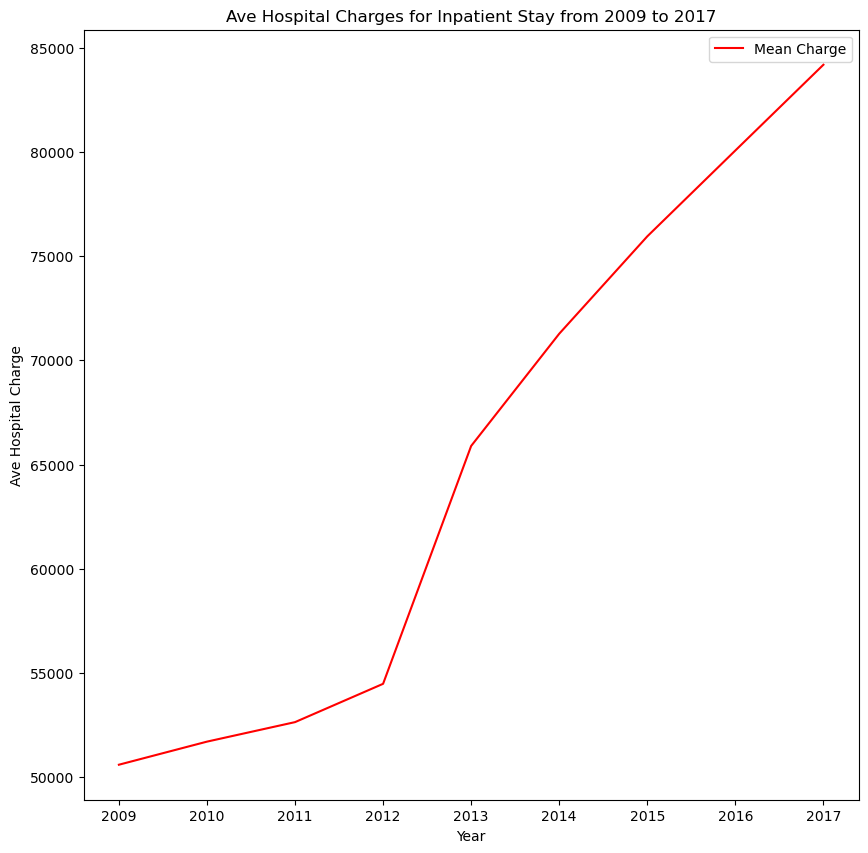

In [42]:
# plotting mean charge data by year

df3combined.plot.line(x='Year', y='Mean Charge', color='red')
plt.xlabel ('Year')
plt.ylabel ('Ave Hospital Charge')
plt.title ("Ave Hospital Charges for Inpatient Stay from 2009 to 2017")
plt.rcParams['figure.figsize'] = (5,5)

# #  Conclusion

Average hospital charges have grown exponentially from 2009 to 2017. Average hospital charge was 50,597 dollars per hospitalization in 2009 and by 2017 it grew to 84,182 dollarsd per hospitalization. While this dataset does not provide more recent data, if we account for 8 percent inflation of 2022 a more current average hospital charge might be closer to 84,182 * 1.08= 90,917 dollars per hospitalization (assuming that hospitals adjusted for inflation but did not raise their prices otherwise).

From the above 3 dataset analysis, we can conclude that hospitals across NYS have identified upper respiratory infections as main conditions that could have been prevented with proper preventive care but resulted in hospitalizations instead. Hospitalization costs were as high as 84 thousand dollars per one hospital stay, resulting in annual cost of 4.35 billion dollars to health insurers. 

Healthfirst can cut the cost of hospitalization claims by improving its preventative care offering. Specifically, it can concentrate on prevention of upper respiratory infections. It should also work to improve coverage for mental health conditions, substance abuse disorders, immunizations and Covid-19 boosters.